# Iris

För att genomföra våra analyser och visualiseringar, importerar vi några vanligt använda Python-paket samt vårt dataset (iris.csv).

In [542]:
# Importera bibliotek och dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as scs 
import seaborn as sns 
from scipy.stats import t
from scipy.stats import norm
from statsmodels.formula.api import ols
# Läs in datasetet
df = pd.read_csv("Data/iris.csv")

En översikt av vårt dataset - `df.describe()`. Det ger en sammanfattning av de statistiska måtten för varje numerisk variabel i datasetet.

In [543]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


För att undersöka fördelningen av olika klasser i vår dataset, använder vi `df["class"].value_counts()`. Denna metod räknar antalet observationer för varje unik klass i kolumnen "class".

In [544]:
df["class"].value_counts()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

För att fokusera på varje unik klass i Iris-datasetet skapaades tre nya DataFrames: `Setosa`, `Versicolor`, och `Virginica`. Varje DataFrame innehåller observationer som tillhör respektive klass.


In [545]:
Setosa = df[df["class"] == "Iris-setosa"]
Versicolor = df[df["class"] == "Iris-versicolor"].reset_index(drop=True)
Virginica = df[df["class"] == "Iris-virginica"].reset_index(drop=True)

In [546]:
Setosa.head(2)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [547]:
Versicolor.head(2)

,sepal_length,sepal_width,petal_length,petal_width,class
0,7.0,3.2,4.7,1.4,Iris-versicolor
1,6.4,3.2,4.5,1.5,Iris-versicolor


In [548]:
Virginica.head(2)

,sepal_length,sepal_width,petal_length,petal_width,class
0,6.3,3.3,6.0,2.5,Iris-virginica
1,5.8,2.7,5.1,1.9,Iris-virginica


För att få en uppfattning om medelvärdena för numeriska variabler för varje Iris-klass:


In [549]:
mean_Setosa = Setosa.select_dtypes(include='number').mean()
mean_Versicolor = Versicolor.select_dtypes(include='number').mean()
mean_Virginica = Virginica.select_dtypes(include='number').mean()
print("Setosa: \n", mean_Setosa, "\n\n Versicolor: \n", mean_Versicolor, "\n\n Virginica: \n", mean_Virginica)

Setosa: 
 sepal_length    5.006
sepal_width     3.418
petal_length    1.464
petal_width     0.244
dtype: float64 

 Versicolor: 
 sepal_length    5.936
sepal_width     2.770
petal_length    4.260
petal_width     1.326
dtype: float64 

 Virginica: 
 sepal_length    6.588
sepal_width     2.974
petal_length    5.552
petal_width     2.026
dtype: float64


För att visualisera sambandet mellan Sepal- och Petal-egenskaper för varje Iris-klass skapades scatter plots.

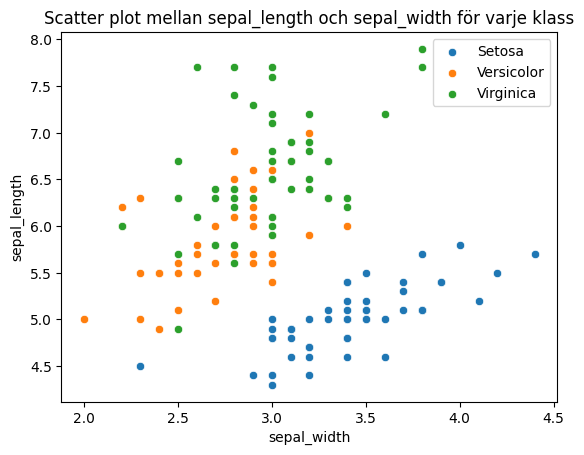

In [550]:
sns.scatterplot(x='sepal_width', y='sepal_length', data=Setosa, label='Setosa')
sns.scatterplot(x='sepal_width', y='sepal_length', data=Versicolor, label='Versicolor')
sns.scatterplot(x='sepal_width', y='sepal_length', data=Virginica, label='Virginica')
plt.legend()
plt.title('Scatter plot mellan sepal_length och sepal_width för varje klass')
plt.show()

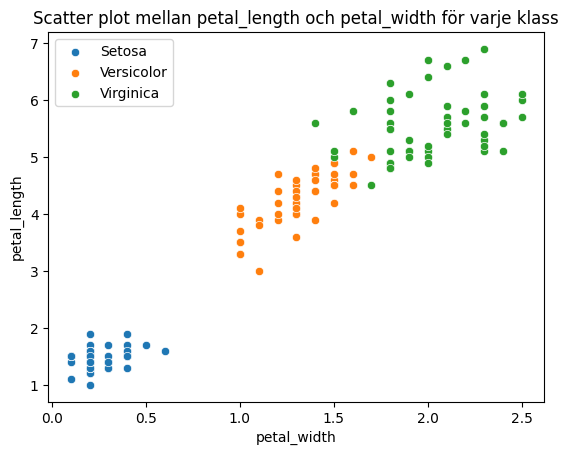

In [551]:
sns.scatterplot(x='petal_width', y='petal_length', data=Setosa, label='Setosa')
sns.scatterplot(x='petal_width', y='petal_length', data=Versicolor, label='Versicolor')
sns.scatterplot(x='petal_width', y='petal_length', data=Virginica, label='Virginica')
plt.legend()
plt.title('Scatter plot mellan petal_length och petal_width för varje klass')
plt.show()

# Regression

För att undersöka det linjära sambandet mellan petal_length och petal_width i Versicolor-stickprovet har vi anpassat en linjär regressionsmodell.

In [552]:
model = ols('petal_length ~ petal_width', data=Versicolor).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           petal_length   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     77.93
Date:                Sun, 04 Feb 2024   Prob (F-statistic):           1.27e-11
Time:                        19:49:36   Log-Likelihood:                -8.5674
No. Observations:                  50   AIC:                             21.13
Df Residuals:                      48   BIC:                             24.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.7813      0.284      6.276      

Resultaten i sammanfattningen ger viktig information om modellen:

- R-kvadrat: Detta mäter andelen varians i petal_length som förklaras av petal_width. En hög R-kvadrat indikerar en bättre passform.
- Koefficient för petal_width: Detta är lutningen på den linjära regressionslinjen och representerar förändringen i petal_length för varje enhetsförändring i petal_width.
- Intercept (Konstanttermen): Detta är där regressionslinjen korsar y-axeln.


# Prediktion med Linjär Regression

För att använda den tidigare anpassade linjära regressionsmodellen för att göra prediktioner, har vi använt modellen för att förutsäga petal_length baserat på petal_width i Versicolor-stickprovet.

In [553]:
ypred = model.predict(Versicolor['petal_width'])

Visualisering av det linjära sambandet mellan 'petal_width' och 'petal_length' i Versicolor-stickprovet.

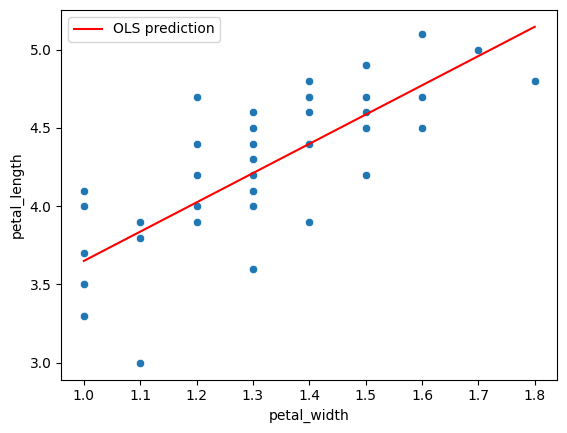

In [554]:
scatterplot = sns.scatterplot(data=Versicolor, x='petal_width', y='petal_length')
# En linje för linjär regressionsprediction
scatterplot.plot([Versicolor['petal_width'].min(), Versicolor['petal_width'].max()],
                  [ypred.min(), ypred.max()],
                  "r", label="OLS prediction")
scatterplot.legend(loc="best")
plt.show()

# Prediktion utanför stickprovet

0     5.519925
1     6.454587
2     8.323912
3    11.127899
dtype: float64


<Axes: xlabel='petal_width', ylabel='petal_length'>

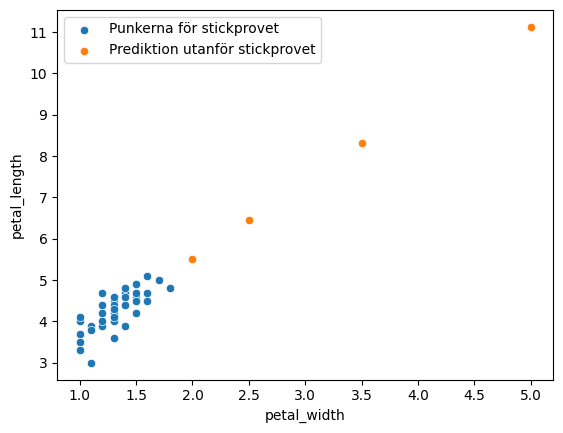

In [555]:
scatterplot = sns.scatterplot(data=Versicolor, x='petal_width', y='petal_length', label='Punkerna för stickprovet')
# Definiera några prediktionspunkter för 'petal_width'
predictions = pd.DataFrame([2,2.5,3.5,5], columns=['petal_width'])
# Prediktioner med den tidigare anpassade linjära regressionsmodellen
ypred = model.predict(predictions)
print(ypred)
# Lägg till prediktionerna 
predictions['pred'] = ypred
# Nytt scatterplot för att visualisera prediktionerna
sns.scatterplot(data = predictions, x = 'petal_width',y = 'pred', label='Prediktion utanför stickprovet')

Först skapades scatterplot som visar sambandet mellan 'petal_width' och 'petal_length' för Versicolor-stickprovet. Sedan definieras några punkter ('petal_width') för vilka vi vill göra utom-stickprovsprediktioner. Dessa prediktioner görs med den tidigare anpassade linjära regressionsmodellen. Slutligen skapas ett nytt scatterplot för att visualisera dessa prediktioner.

# Korrelation

För att analysera sambandet mellan olika egenskaper hos Versicolor, har vi beräknat korrelationsmatrisen.


In [556]:
corr = Versicolor[['petal_width', 'petal_length','sepal_width','sepal_length']].corr() 
corr

,petal_width,petal_length,sepal_width,sepal_length
petal_width,1.000000,0.786668,0.663999,0.546461
petal_length,0.786668,1.000000,0.560522,0.754049
sepal_width,0.663999,0.560522,1.000000,0.525911
sepal_length,0.546461,0.754049,0.525911,1.000000


För att tydligt visualisera korrelationsmatrisen för Versicolor-egenskaper, skapades en heatmap.

<Figure size 640x480 with 0 Axes>

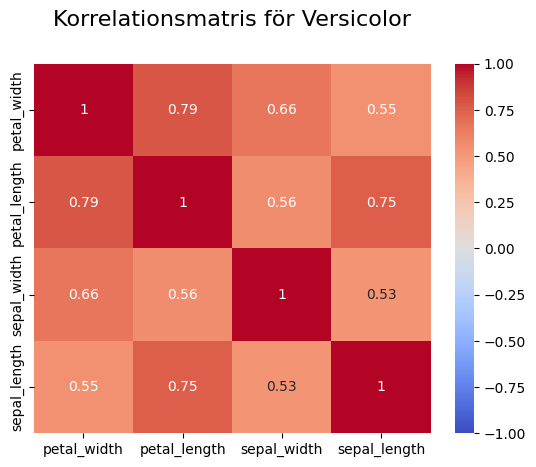

<Figure size 640x480 with 0 Axes>

In [557]:
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Korrelationsmatris för Versicolor', y=1.08, fontsize=16)
plt.figure()

# KONFIDENSINTERVALL

För att beräkna konfidensintervallet för medelvärdet används följande formeln:


### ${\bar x} \pm Z_{\alpha/2} \frac{σ}{\sqrt{n}}$


In [558]:
mean = Versicolor["petal_length"].mean() # Mdelvärde för stickprovet (x bar)
std = Versicolor["petal_length"].std() # Standardavvikelse för stickprovet (σ)
n = len(Versicolor["petal_length"]) # Antal för stickprovet (n)
alpha = 0.05 # Signifikansnivå
t_crit = t.ppf(1-alpha/2, n-1) # Kritiskt t-värde
sem = std / np.sqrt(n) # Medelvärdesstandardfel 
upper = mean + t_crit * sem # Övre gräns
lower = mean - t_crit * sem # Undre gräns
# Avrundning till 3 decimal
lower = np.round(lower, 3)
upper = np.round(upper, 3)
mean = np.round(mean, 3)
print(lower, " < ", mean, " < ", upper)

4.126  <  4.26  <  4.394


För att visualisera fördelningen av petal_length i Versicolor-stickprovet och markera konfidensintervallet, skapades följande graf:


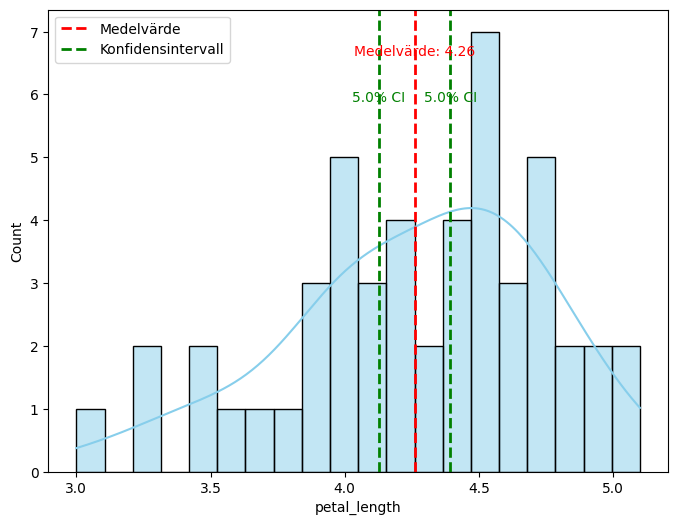

In [559]:
# Skapa en graf med Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(Versicolor["petal_length"], kde=True, color='skyblue', bins=20)
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label='Medelvärde')
plt.axvline(upper, color='green', linestyle='dashed', linewidth=2, label='Konfidensintervall')
plt.axvline(lower, color='green', linestyle='dashed', linewidth=2)
# Markera medelvärdet och konfidensintervallens gränser
plt.text(mean, plt.ylim()[1] * 0.9, f'Medelvärde: {mean:.2f}', color='red', ha='center')
plt.text(upper, plt.ylim()[1] * 0.8, f'{alpha*100}% CI', color='green', ha='center')
plt.text(lower, plt.ylim()[1] * 0.8, f'{alpha*100}% CI', color='green', ha='center')
plt.legend()
plt.show()

Detta konfidensintervall på 95% ger oss ett intervall där vi med rimlig säkerhet förväntar oss att det sanna medelvärdet för petal_length i populationen finns.
- Det 95% konfidensintervallet för medelvärdet sträcker sig från 4.126 till 4.394.
- Vi är 95% säkra på att det verkliga medelvärdet ligger inom detta intervall baserat på det observerade stickprovsmedelvärdet, standardavvikelsen och stickprovets storlek.